# Intro

Tracking and predicting player performance using ML could be done in the following two ways I have found suitable for this project.
It's either the Position specific method, or the ensemble method. Both are not so different, I'll explain below.
### ***The Ensemble method:*** 
In this method I will filter the data based on player position, then train several models based on player positions so that the results would be specific to the position of the player.
If for example there are four unique player positions (eg: gk, df, mf, fw ... etc) I would build four models for each. That will make the predictions tailored according to the players position.

In [1]:
# Importations of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)# To show all the columns on the data set instead of hiding them in between usning the "a,b,c...g,h,i" format.
%matplotlib inline
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading of the CSV file and assigning it to the data frame 'df'.
df = pd.read_csv("2022-2023 Football Player Stats 2.csv", encoding='latin1', on_bad_lines='skip')

In [141]:
# Frist look at the dataframe.
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Rk;Player;Nation;Pos;Squad;Comp;Age;Born;MP;Starts;Min;90s;Goals;Shots;SoT;SoT%;G/Sh;G/SoT;ShoDist;ShoFK;ShoPK;PKatt;PasTotCmp;PasTotAtt;PasTotCmp%;PasTotDist;PasTotPrgDist;PasShoCmp;PasShoAtt;PasShoCmp%;PasMedCmp;PasMedAtt;PasMedCmp%;PasLonCmp;PasLonAtt;PasLonCmp%;Assists;PasAss;Pas3rd;PPA;CrsPA;PasProg;PasAtt;PasLive;PasDead;PasFK;TB;Sw;PasCrs;TI;CK;CkIn;CkOut;CkStr;PasCmp;PasOff;PasBlocks;SCA;ScaPassLive;ScaPassDead;ScaDrib;ScaSh;ScaFld;ScaDef;GCA;GcaPassLive;GcaPassDead;GcaDrib;GcaSh;GcaFld;GcaDef;Tkl;TklWon;TklDef3rd;TklMid3rd;TklAtt3rd;TklDri;TklDriAtt;TklDri%;TklDriPast;Blocks;BlkSh;BlkPass;Int;Tkl+Int;Clr;Err;Touches;TouDefPen;TouDef3rd;TouMid3rd;TouAtt3rd;TouAttPen;TouLive;ToAtt;ToSuc;ToSuc%;ToTkl;ToTkl%;Carries;CarTotDist;CarPrgDist;CarProg;Car3rd;CPA;CarMis;CarDis;Rec;RecProg;CrdY;CrdR;2CrdY;Fls;Fld;Off;Crs;TklW;PKwon;PKcon;OG;Recov;AerWon;AerLost;AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,1;Brenden Aaronson;USA;MFFW;Leeds United;Premi...
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,2;Yunis Abdelhamid;MAR;DF;Reims;Ligue 1;35;198...
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,3;Himad Abdelli;FRA;MFFW;Angers;Ligue 1;23;199...
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9

The data set is really "dirty", it came in a format that was pretty "ugly", now I have to remove the excess columns you see in the cells above and below before determining which ones will be suitable for the model.

In [4]:
# A look at all the columns in the data set.
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts',
       ...
       'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon', 'AerLost',
       'AerWon%',
       'Rk;Player;Nation;Pos;Squad;Comp;Age;Born;MP;Starts;Min;90s;Goals;Shots;SoT;SoT%;G/Sh;G/SoT;ShoDist;ShoFK;ShoPK;PKatt;PasTotCmp;PasTotAtt;PasTotCmp%;PasTotDist;PasTotPrgDist;PasShoCmp;PasShoAtt;PasShoCmp%;PasMedCmp;PasMedAtt;PasMedCmp%;PasLonCmp;PasLonAtt;PasLonCmp%;Assists;PasAss;Pas3rd;PPA;CrsPA;PasProg;PasAtt;PasLive;PasDead;PasFK;TB;Sw;PasCrs;TI;CK;CkIn;CkOut;CkStr;PasCmp;PasOff;PasBlocks;SCA;ScaPassLive;ScaPassDead;ScaDrib;ScaSh;ScaFld;ScaDef;GCA;GcaPassLive;GcaPassDead;GcaDrib;GcaSh;GcaFld;GcaDef;Tkl;TklWon;TklDef3rd;TklMid3rd;TklAtt3rd;TklDri;TklDriAtt;TklDri%;TklDriPast;Blocks;BlkSh;BlkPass;Int;Tkl+Int;Clr;Err;Touches;TouDefPen;TouDef3rd;TouMid3rd;TouAtt3rd;TouAttPen;TouLive;ToAtt;ToSuc;ToSuc%;ToTkl;ToTkl%;Carries;CarTotDist;CarPrgDist;CarProg;Car3rd;CPA;CarMis;CarDis;Rec;Re

In [5]:
# Cutting removing unwanted columns.
df = df[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw', 'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd', 'TouAtt3rd', 'TouAttPen', 'TouLive', 'ToAtt', 'ToSuc', 'ToSuc%', 'ToTkl', 'ToTkl%', 'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CPA', 'CarMis', 'CarDis', 'Rec', 'RecProg', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'AerWon', 'AerLost', 'AerWon%']]

In [144]:
# Second look at the dataframe with excess columns removed.
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [6]:
df.shape #checking the dimensions of the data.

(2026, 123)

In [7]:
df.info() #Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Columns: 123 entries, Player to AerWon%
dtypes: float64(112), int64(6), object(5)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.00000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.0000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,25.824778,1996.334156,12.026160,8.639191,774.664363,8.608490,1.080948,1.235030,0.419373,24.428036,0.063954,0.168633,14.178480,0.033075,0.008327,0.011175,33.537349,42.894077,75.342300,578.338598,197.585415,15.521155,17.936668,84.186673,13.667858,16.278949,78.578381,3.238677,5.890252,51.756219,0.080138,0.870755,2.517858,0.75503,0.199946,3.369822,42.894077,38.819640,3.897591,0.979620,0.110158,0.310918,1.642818,1.837142,0.402517,0.175035,0.154136,0.003346,33.537349,0.176180,0.917799,2.068080,1.504418,0.16458,0.112192,0.142083,0.109531,0.035321,0.200202,0.142147,0.009931,0.010573,0.021056,0.013623,0.002927,1.707226,0.991041,0.811871,0.655385,0.240044,0.752038,1.429817,44.956910,0.677734,1.082749,0.281293,0.801639,0.820148,2.526530,1.566130,0.022019,53.810760,4.525538,15.647404,24.335528,14.391081,2.213376,53.799408,1.807384,0.721037,34.4269,0.858184,37.993929,31.847947,172.041130,83.126974,1.698312,1.265207,0.451481,1.677182,1.061254,34.637897,4.017927,0.226308,0.017345,0.006451,1.284768,1.149501,0.192108,1.642818,0.991041,0.010513,0.016663,0.002670,4.961688,1.314245,1.515267,43.446742
std,4.453479,4.452591,6.828684,7.027046,593.520214,6.594989,2.122743,1.365226,0.779108,23.969816,0.114613,0.260706,8.506037,0.158887,0.040796,0.051464,17.453351,18.856326,13.468116,330.912049,145.021629,8.553423,9.101094,15.380641,9.383481,9.946856,19.372929,2.938791,4.932989,23.897609,0.194018,1.102751,2.194889,1.10094,0.520694,2.647936,18.856326,17.990377,3.970063,1.164595,0.357293,0.585962,2.292397,3.308539,1.090269,0.680557,0.522958,0.031243,17.453351,0.432019,1.064525,1.909975,1.441639,0.49604,0.453532,0.355675,0.252814,0.162981,0.361946,0.294580,0.050855,0.067075,0.138888,0.055745,0.025296,1.776989,1.271624,1.183943,0

In [148]:
df.loc[df['Pos']=='Milan'] # This shows that the data has inconsistencies, the "Pos" for position contains "Millan" which is a football team.

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%


In [9]:
df['Pos'].unique() # Showing all the unique values on the "Pos" column. It has so many improper values.

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF', 'GK',
       'FWDF'], dtype=object)

Removing those unwanted values from the data set by excluding them using a simple filter like method.

In [10]:
valid_positions = ['GK', 'DF', 'MF', 'FW', 'DFMF', 'MFFW', 'FWMF', 'FWDF', 'DFFW', 'MFDF']
# Defining actual player positions.

In [11]:
# Flag rows with valid positions
df['Position_Cleaned'] = df['Pos'].apply(lambda x: x if x in valid_positions else 'Invalid')

In [12]:
team_names = df.loc[df['Position_Cleaned'] == 'Invalid', 'Pos'].unique()
print("Potential team names:", team_names)
# Filtering out unwanted values.

Potential team names: []


In [13]:
df.loc[df['Position_Cleaned'] == 'Invalid', 'Position_Cleaned'] = np.nan # making the unwanted values nan.

In [14]:
df = df[df['Position_Cleaned'] != 'Invalid'] # Re-assigning the data set without unwanted values.

In [16]:
df.head(5)

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Position_Cleaned
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2,MFFW
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0,DF
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1,MFFW
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0,MF
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0

In [17]:
len(df['Position_Cleaned'].unique())
# There are 11 unique player positions, and that could affect the performance of the model, so were trimming it down.

10

In [18]:
# keeping the original, just incase things go wrong with remapping.
"""position_mapping = {
    'MFFW': 'MF',
    'FWMF': 'FW',
    'DFMF': 'DF',
    'MFDF': 'MF',
    'FWDF': 'FW',
    'DFFW': 'DF'
}"""
position_mapping = {
    'MFFW': 'AM',
    'FWMF': 'MF',
    'DFMF': 'DFM',
    'MFDF': 'CDM',
    'FWDF': 'FW',
    'DFFW': 'DF'
}

# Map combined positions to primary positions
df['Position_Cleaned'] = df['Position_Cleaned'].replace(position_mapping)


In [19]:
print(f'Unique Player positions left: {len(df['Position_Cleaned'].unique())}')
print(df['Position_Cleaned'].unique())

Unique Player positions left: 7
['AM' 'DF' 'MF' 'FW' 'CDM' 'DFM' 'GK']


In [20]:
df.drop(columns=['Pos'], inplace=True)  # Dropping the "Pos" column.

In [21]:
print(f'Available columns left: {len(df.columns)}') # number of columns left.

Available columns left: 123


Having trimmed down the unique player positions from 11 to 5.
However there are still up to 123 columns, consulting with someone with domain expertise will be necessary in selecting the important variables to produce the best model.

In [22]:
# Remaining Columns
for col in df.columns:
    print(f'{col},', end = " ")

Player, Nation, Squad, Comp, Age, Born, MP, Starts, Min, 90s, Goals, Shots, SoT, SoT%, G/Sh, G/SoT, ShoDist, ShoFK, ShoPK, PKatt, PasTotCmp, PasTotAtt, PasTotCmp%, PasTotDist, PasTotPrgDist, PasShoCmp, PasShoAtt, PasShoCmp%, PasMedCmp, PasMedAtt, PasMedCmp%, PasLonCmp, PasLonAtt, PasLonCmp%, Assists, PasAss, Pas3rd, PPA, CrsPA, PasProg, PasAtt, PasLive, PasDead, PasFK, TB, Sw, PasCrs, TI, CK, CkIn, CkOut, CkStr, PasCmp, PasOff, PasBlocks, SCA, ScaPassLive, ScaPassDead, ScaDrib, ScaSh, ScaFld, ScaDef, GCA, GcaPassLive, GcaPassDead, GcaDrib, GcaSh, GcaFld, GcaDef, Tkl, TklWon, TklDef3rd, TklMid3rd, TklAtt3rd, TklDri, TklDriAtt, TklDri%, TklDriPast, Blocks, BlkSh, BlkPass, Int, Tkl+Int, Clr, Err, Touches, TouDefPen, TouDef3rd, TouMid3rd, TouAtt3rd, TouAttPen, TouLive, ToAtt, ToSuc, ToSuc%, ToTkl, ToTkl%, Carries, CarTotDist, CarPrgDist, CarProg, Car3rd, CPA, CarMis, CarDis, Rec, RecProg, CrdY, CrdR, 2CrdY, Fls, Fld, Off, Crs, TklW, PKwon, PKcon, OG, Recov, AerWon, AerLost, AerWon%, Positi

In [23]:
# There are still columns with inconsistencies we need to find them and clean them
# Players from 103 Different Nationalities/Countries
for i in df.columns:
    print(f'{i}:',df[i].unique())

Player: ['Brenden Aaronson' 'Yunis Abdelhamid' 'Himad Abdelli' ... 'Kurt Zouma'
 'Petar Zovko' 'Igor Zubeldia']
Nation: ['USA' 'MAR' 'FRA' 'GHA' 'DEN' 'BRA' 'ENG' 'ITA' 'SCO' 'GER' 'SUI' 'CIV'
 'COL' 'SWE' 'NGA' 'AUT' 'NOR' 'ARG' 'ESP' 'PAR' 'GAB' 'SEN' 'WAL' 'JAM'
 'BUL' 'URU' 'JPN' 'KVX' 'ALB' 'TOG' 'ALG' 'TUR' 'IRN' 'BEL' 'NED' 'CMR'
 'ZAM' 'GRN' 'LUX' 'GAM' 'BFA' 'IRL' 'SUR' 'POL' 'GNB' 'SVN' 'MLI' 'MAD'
 'CHI' 'CRO' 'TUN' 'NZL' 'ECU' 'PER' 'POR' 'MKD' 'CPV' 'ISR' 'CAN' 'GUI'
 'BEN' 'BIH' 'HON' 'ISL' 'EGY' 'NIR' 'AUS' 'CRC' 'LTU' 'RUS' 'SRB' 'SVK'
 'KOR' 'VEN' 'PHI' 'ROU' 'HAI' 'FIN' 'MNE' 'ZIM' 'COD' 'SLE' 'GRE' 'CYP'
 'CTA' 'UKR' 'LVA' 'GEO' 'MEX' 'COM' 'MTQ' 'MOZ' 'DOM' 'CGO' 'ARM' 'RSA'
 'BDI' 'ANG' 'EQG' 'HUN' nan 'GUF' 'CZE' 'UZB']
Squad: ['Leeds United' 'Reims' 'Angers' 'Lens' 'Lorient' 'Hellas Verona'
 'Auxerre' 'Rennes' 'Betis' 'Toulouse' 'Roma' 'Inter' 'Nantes'
 'Southampton' 'Fulham' 'Dortmund' 'Leverkusen' 'Milan' 'Bologna'
 'Cremonese' 'Troyes' 'Werder Bremen' 'Spezia'

There's clearly allot of work to do here, before proceeding with preprocessing, I need to be sure what columns I'll be working with. It wouldn't be time efficient if I work on irrelevant columns.

In [24]:
# List of top 100 attributes
selected_columns = [
    'Player', 'Position_Cleaned', 'Age', 'Born',  # General Information
    'MP', 'Starts', 'Min', '90s',                      # Playing Time
    'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT',  # Scoring and Shooting
    'ShoDist', 'ShoFK', 'ShoPK', 'PKatt',              # Scoring Details
    'PasTotCmp', 'PasTotAtt', 'PasTotCmp%',            # Passing Metrics
    'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%',
    'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%',
    'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'TB', 'Sw',
    'PasCrs', 'PasLive',                                # Passing
    'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib',    # Creativity
    'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead',
    'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef',            # Chance Creation
    'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',         # Defensive Actions
    'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 
    'Blocks', 'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 
    'Clr', 'Err',                                      # Defensive Actions Continued
    'Touches', 'TouDefPen', 'TouDef3rd', 'TouMid3rd',  # Ball Control
    'TouAtt3rd', 'TouAttPen', 'ToAtt', 'ToSuc', 'ToSuc%', 'ToTkl', 'ToTkl%',
    'Carries', 'CarTotDist', 'CarPrgDist', 'CarProg', 'Car3rd', 'CPA',
    'CarMis', 'CarDis',                                # Ball Control Continued
    'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'OG',# Discipline
    'AerWon', 'AerLost', 'AerWon%',                    # Aerial Duels
    'Rec', 'RecProg', 'Recov', 'PKwon', 'PKcon'        # Recovery
]

# Filter the DataFrame to keep only the selected columns
df2 = df[selected_columns]


In [25]:
print('There are',len(df2.columns),'columns left:')
for col in df2.columns:
    print(f'{col},', end = " ")

There are 106 columns left:
Player, Position_Cleaned, Age, Born, MP, Starts, Min, 90s, Goals, Shots, SoT, SoT%, G/Sh, G/SoT, ShoDist, ShoFK, ShoPK, PKatt, PasTotCmp, PasTotAtt, PasTotCmp%, PasTotDist, PasTotPrgDist, PasShoCmp, PasShoAtt, PasShoCmp%, PasMedCmp, PasMedAtt, PasMedCmp%, PasLonCmp, PasLonAtt, PasLonCmp%, Assists, PasAss, Pas3rd, PPA, CrsPA, PasProg, TB, Sw, PasCrs, PasLive, SCA, ScaPassLive, ScaPassDead, ScaDrib, ScaSh, ScaFld, ScaDef, GCA, GcaPassLive, GcaPassDead, GcaDrib, GcaSh, GcaFld, GcaDef, Tkl, TklWon, TklDef3rd, TklMid3rd, TklAtt3rd, TklDri, TklDriAtt, TklDri%, TklDriPast, Blocks, BlkSh, BlkPass, Int, Tkl+Int, Clr, Err, Touches, TouDefPen, TouDef3rd, TouMid3rd, TouAtt3rd, TouAttPen, ToAtt, ToSuc, ToSuc%, ToTkl, ToTkl%, Carries, CarTotDist, CarPrgDist, CarProg, Car3rd, CPA, CarMis, CarDis, CrdY, CrdR, 2CrdY, Fls, Fld, Off, OG, AerWon, AerLost, AerWon%, Rec, RecProg, Recov, PKwon, PKcon, 

In [165]:
#checking the data frame to ensure all selected columns are included with now irrelevant columns.
df2.info() 
df2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Columns: 106 entries, Player to PKcon
dtypes: float64(98), int64(6), object(2)
memory usage: 1.6+ MB


,Player,Position_Cleaned,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,TB,Sw,PasCrs,PasLive,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,CrdY,CrdR,2CrdY,Fls,Fld,Off,OG,AerWon,AerLost,AerWon%,Rec,RecProg,Recov,PKwon,PKcon
0,Brenden Aaronson,AM,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.2,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,0.17,0.00,2.54,28.1,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.9,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,0.11,0.0,0.0,0.62,2.26,0.17,0.0,0.34,1.19,22.2,30.2,5.65,4.86,0.0,0.0
1,Yunis Abdelhamid,DF,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.0,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,0.00,0.55,0.18,43.3,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.0,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,0.09,0.0,0.0,1.32,0.50,0.05,0.0,2.18,1.23,64.0,34.5,0.23,6.64,0.0,0.0


In [26]:
#finding missing values for all our columns.
for i in df2.columns:
    print(f'{i}:{df2[i].isnull().sum()}')
    
print(f'Totall missing values: {df2.isnull().sum().sum()}')

Player:0
Position_Cleaned:0
Age:0
Born:0
MP:0
Starts:0
Min:0
90s:0
Goals:0
Shots:0
SoT:0
SoT%:0
G/Sh:0
G/SoT:0
ShoDist:0
ShoFK:0
ShoPK:0
PKatt:0
PasTotCmp:0
PasTotAtt:0
PasTotCmp%:0
PasTotDist:0
PasTotPrgDist:0
PasShoCmp:0
PasShoAtt:0
PasShoCmp%:0
PasMedCmp:0
PasMedAtt:0
PasMedCmp%:0
PasLonCmp:0
PasLonAtt:0
PasLonCmp%:0
Assists:0
PasAss:0
Pas3rd:0
PPA:0
CrsPA:0
PasProg:0
TB:0
Sw:0
PasCrs:0
PasLive:0
SCA:0
ScaPassLive:0
ScaPassDead:0
ScaDrib:0
ScaSh:0
ScaFld:0
ScaDef:0
GCA:0
GcaPassLive:0
GcaPassDead:0
GcaDrib:0
GcaSh:0
GcaFld:0
GcaDef:0
Tkl:0
TklWon:0
TklDef3rd:0
TklMid3rd:0
TklAtt3rd:0
TklDri:0
TklDriAtt:0
TklDri%:0
TklDriPast:0
Blocks:0
BlkSh:0
BlkPass:0
Int:0
Tkl+Int:0
Clr:0
Err:0
Touches:0
TouDefPen:0
TouDef3rd:0
TouMid3rd:0
TouAtt3rd:0
TouAttPen:0
ToAtt:0
ToSuc:0
ToSuc%:0
ToTkl:0
ToTkl%:0
Carries:0
CarTotDist:0
CarPrgDist:0
CarProg:0
Car3rd:0
CPA:0
CarMis:0
CarDis:0
CrdY:0
CrdR:0
2CrdY:0
Fls:0
Fld:0
Off:0
OG:0
AerWon:0
AerLost:0
AerWon%:0
Rec:0
RecProg:0
Recov:0
PKwon:0
PKcon:0
To

In [27]:
#Dropping rows with missing values.
df2 = df2.dropna()

There are inconsistencies between the "age" and "born" columns, where age is carrying values like 1992 and born carrying values like 4, I will be converting all the invalid 'age' values to NaN and recalculate them based on the year value, also doing the same for year calculating it based on age.

In [28]:
from datetime import datetime

# Current year
current_year = datetime.now().year

# Convert invalid 'Age' values to NaN
df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')
df2['Age'] = df2['Age'].where((df2['Age'] >= 15) & (df2['Age'] <= 30))  # Valid age range for players

# Fill missing 'Age' using 'Born'
df2['Age'] = df2['Age'].fillna(current_year - df2['Born'])

In [29]:
# Fill missing 'Born' using 'Age'
df2['Born'] = df2['Born'].fillna(current_year - df2['Age'])

In [30]:
print(df2[['Born', 'Age']].info())
print(df2[['Born', 'Age']].sample(frac=0.1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Born    2026 non-null   int64  
 1   Age     2026 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.8 KB
None
      Born   Age
1718  1996  26.0
1447  2001  21.0
1401  2000  23.0
504   1988  37.0
1592  1993  29.0
...    ...   ...
796   1996  26.0
511   1996  26.0
1088  1998  24.0
866   1999  23.0
660   1991  34.0

[203 rows x 2 columns]


In [31]:
#As seen above there are players older than 30 years old, and we do not want them.
df2 = df2[df2['Age'] <= 30]

In [32]:
#just to confirm all our players are 30 and bellow.
print(df2['Age'].max())  # Should return 30 or less
print(df2['Age'].sample(20))  # Display the 20 random rows

30.0
1052    30.0
1345    23.0
1917    20.0
647     23.0
1131    29.0
1186    25.0
1298    30.0
1240    26.0
1160    22.0
1907    22.0
1385    21.0
1121    25.0
19      22.0
1445    26.0
1394    30.0
1323    23.0
514     23.0
1474    25.0
82      24.0
451     22.0
Name: Age, dtype: float64


In [33]:
#reseting the index
df2.reset_index(drop=True, inplace=True)

In [34]:
df2.head(10)

,Player,Position_Cleaned,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,TB,Sw,PasCrs,PasLive,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,CrdY,CrdR,2CrdY,Fls,Fld,Off,OG,AerWon,AerLost,AerWon%,Rec,RecProg,Recov,PKwon,PKcon
0,Brenden Aaronson,AM,22.0,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.20,31.0,74.9,293.0,85.7,13.30,16.20,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,0.17,0.00,2.54,28.10,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.00,0.06,0.00,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,0.11,0.0,0.0,0.62,2.26,0.17,0.00,0.34,1.19,22.2,30.2,5.65,4.86,0.00,0.0
1,Himad Abdelli,AM,23.0,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.00,49.5,80.8,676.0,188.1,18.50,22.00,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,0.12,0.23,1.05,48.10,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,0.12,0.0,0.0,1.74,1.28,0.00,0.00,0.93,1.05,47.1,43.4,5.93,8.14,0.00,0.0
2,Salis Abdul Samed,MF,22.0,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.50,64.9,91.6,946.3,226.9,29.60,31.80,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,0.05,0.20,0.35,63.10,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,0.15,0.0,0.0,2.45,1.35,0.00,0.05,0.50,0.50,50.0,56.5,1.70,6.60,0.00,0.0
3,Laurent Abergel,MF,30.0,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.90,43.4,87.3,613.6,224.7,17.90,19.40,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,0.39,0.16,0.23,42.60,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.00,0.00,0.00,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,0.16,0.0,0.0,0.93,1.01,0.00,0.00,0.31,0.39,44.4,36.4,0.47,6.51,0.00,0.0
4,Oliver Abildgaard,MF,26.0,1996,1,0,11,0.1,0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,20.00,30.0,66.7,310.0,90.0,10.00,10.00,100.0,10.00,10.00,100.0,0.00,10.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.00,10.00,0.00,0.00,10.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,50.0,0.00,20.00,20.0,10.00,0.00,0.00,0.00,0.0,0.00,0.0,10.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,10.00,0.0,10.0,0.00,10.00,0.00,0.0
5,Matthis Abline,MF,19.0,2003,5,2,185,2.1,1,4.29,1.43,33.3,0.11,0.33,20.4,0.00,0.0,0.0,7.14,10.0,71.4,139.5,40.0,1.43,2.38,60.0,4.76,5.24,90.9,0.48,0.95,50.0,0.00,0.00,0.48,1.43,0.48,1.90,0.00,0.00,0.95,9.05,0.48,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.43,0.48,0.00,0.95,0.48,0.00,0.95,0.0,0.95,0.48,0.00,0.48,0.48,1.90,0.48,0.00,25.7,0.48,1.43,11.4,12.90,6.67,1.43,0.48,33.3,0.95,66.7,17.1,97.1,10.5,1.43,0.00,0.95,7.62,3.33,0.00,0.0,0.0,0.95,1.43,0.48,0.00,1.43,1.43,50.0,19.0,6.67,0.48,0.00,0.0
6,Mat

In [36]:
#data is ready for EDA let's save a copy first.
df2.to_csv("cleaned_dataset.csv", index=False)

# EDA

In [37]:
# starting with a general overview
print(df2.info())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 106 entries, Player to PKcon
dtypes: float64(99), int64(5), object(2)
memory usage: 1.4+ MB
None
               Age         Born           MP       Starts          Min  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean     24.463529  1997.692941    11.872941     8.468235   759.475882   
std       3.369421     3.373347     6.919641     7.081352   597.891738   
min      15.000000  1992.000000     1.000000     0.000000     1.000000   
25%      22.000000  1995.000000     5.000000     2.000000   191.000000   
50%      25.000000  1998.000000    13.000000     7.000000   664.500000   
75%      27.000000  2000.000000    18.000000    15.000000  1260.250000   
max      30.000000  2007.000000    23.000000    23.000000  2070.000000   

               90s        Goals        Shots          SoT         SoT%  \
count  1700.000000  1700.000000  1700.000000  1700.000000  1700.000000   
mean 

In [38]:
from mplsoccer import Pitch # this is also a library for visualization, specifically for Football (Soccer).


## Top 10 Goal Scorers.

In [39]:
# Sample filtering for top scorers and creators (replace with actual data logic)
top_scorers = df2.nlargest(10, 'Goals')[['Player', 'Goals']]
top_creators = df2.nlargest(10, 'Assists')[['Player', 'Assists']]

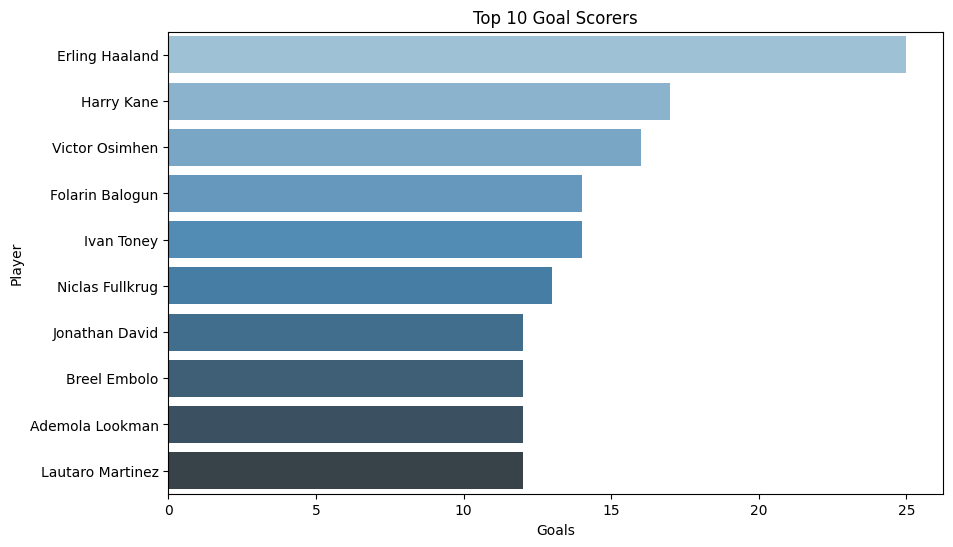

In [40]:
# Bar Chart for Top 10 Scorers
plt.figure(figsize=(10, 6))
sns.barplot(x='Goals', y='Player', data=top_scorers, palette='Blues_d')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals')
plt.ylabel('Player')
plt.show()


## Top 10 Assist Creators.

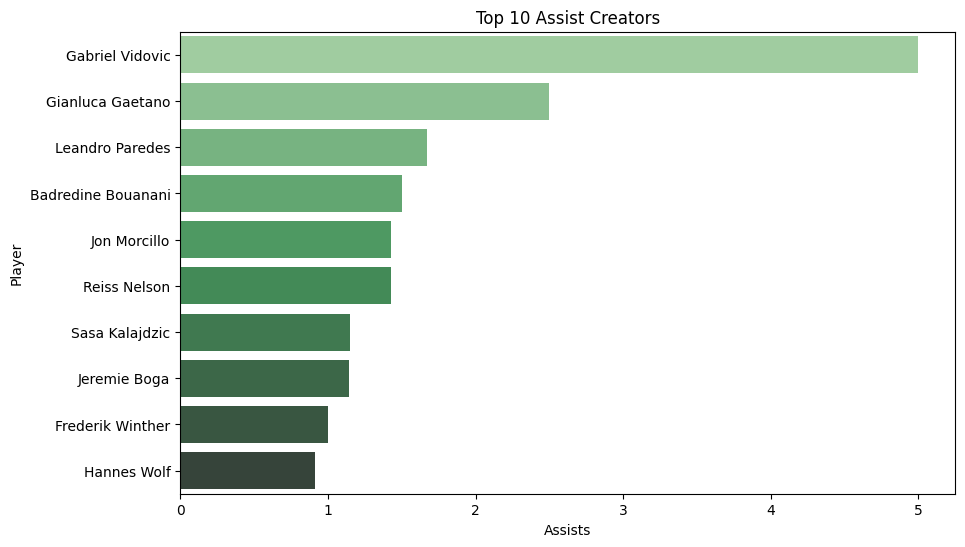

In [41]:
# Bar Chart for Top 10 Creators
plt.figure(figsize=(10, 6))
sns.barplot(x='Assists', y='Player', data=top_creators, palette='Greens_d')
plt.title('Top 10 Assist Creators')
plt.xlabel('Assists')
plt.ylabel('Player')
plt.show()

## Goals vs Assist by Player Position.

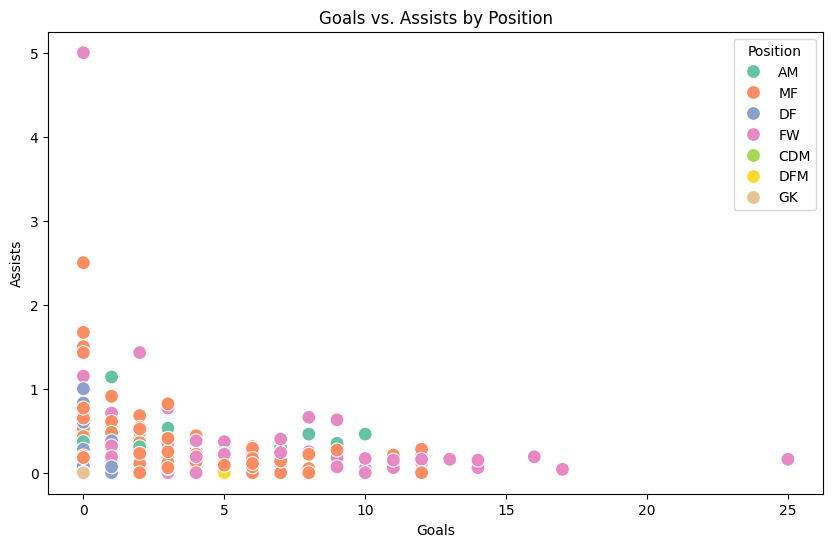

In [43]:
# Scatter Plot for Goals vs. Assists
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Goals', y='Assists', data=df2, hue='Position_Cleaned', palette='Set2', s=100)
plt.title('Goals vs. Assists by Position')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.legend(title='Position')
plt.show()

## Visualization of passes and shots on the pitch.

Text(0.5, 1.0, 'Passes and Shots Visualization')

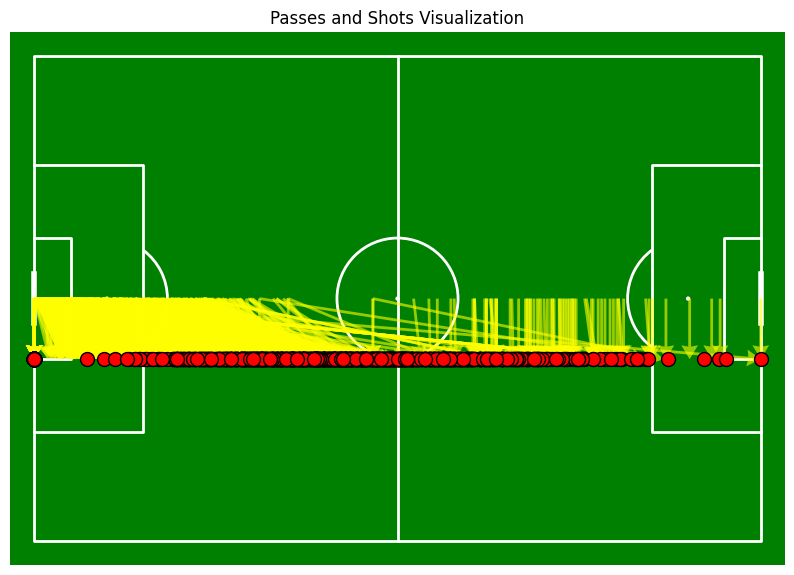

In [47]:
# Set the figure size using plt.figure()
fig, ax = plt.subplots(figsize=(10, 7))

# Create a soccer pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
pitch.draw(ax=ax)

# Example visualization of passes on the pitch
for i, row in df2.iterrows():
    xstart = (row['TouDefPen'] / df2['TouDefPen'].max()) * 120  # Normalize to pitch length
    xend = xstart + (row['PasProg'] / df2['PasProg'].max()) * 120  # Add progression
    ystart = 40  # Arbitrary y-coordinate for start (can use another column for variation)
    yend = ystart + 10  # Arbitrary progression (modify if needed)

    # Draw arrows for passes (Yellow)
    pitch.arrows(
        xstart=xstart, ystart=ystart,
        xend=xend, yend=yend,
        width=2, headwidth=6, color='yellow', alpha=0.6, ax=ax
    )

# Example visualization of shots on the pitch (Red)
for i, row in df2.iterrows():
    x = (row['ShoDist'] / df2['ShoDist'].max()) * 120  # Normalize to pitch length
    y = 50  # Arbitrary y-coordinate for demonstration

    # Plot scatter points for shots
    pitch.scatter(
        x=x, y=y,
        color='red', edgecolors='black', s=100, ax=ax
    )

# Add title and display the plot
plt.title('Passes and Shots Visualization')

## A touch heatmap (Areas where players engage most with the ball on the pitch.)

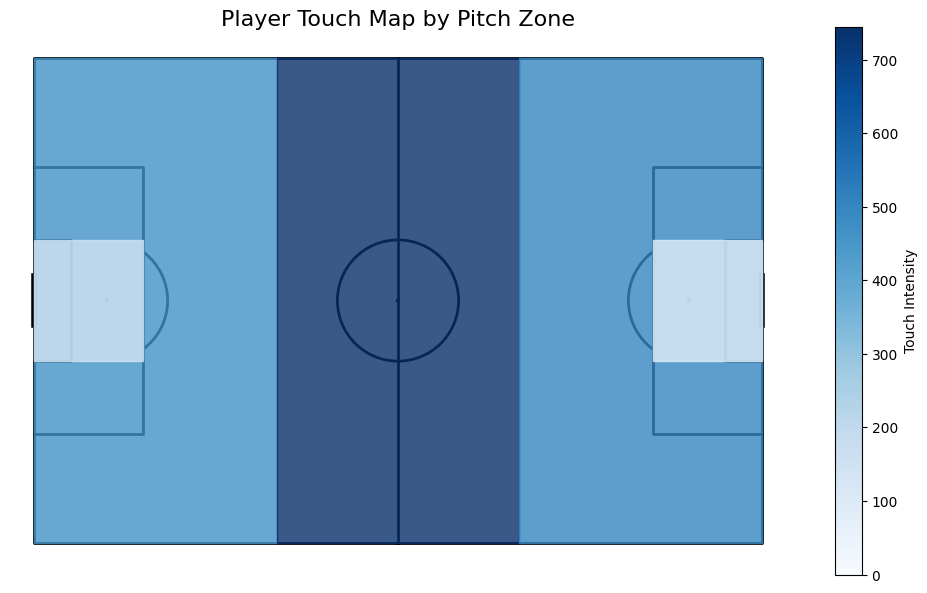

In [62]:
# Step 1: Normalize touch data
df2['TouDef3rd_norm'] = df2['TouDef3rd'] / df2['Touches']
df2['TouMid3rd_norm'] = df2['TouMid3rd'] / df2['Touches']
df2['TouAtt3rd_norm'] = df2['TouAtt3rd'] / df2['Touches']
df2['TouDefPen_norm'] = df2['TouDefPen'] / df2['Touches']
df2['TouAttPen_norm'] = df2['TouAttPen'] / df2['Touches']

# Step 2: Aggregate normalized data (this can be for an individual or the whole group)
# Here we sum up the normalized values for visualization
touch_data = {
    'Defensive Third': df2['TouDef3rd_norm'].sum(),
    'Middle Third': df2['TouMid3rd_norm'].sum(),
    'Attacking Third': df2['TouAtt3rd_norm'].sum(),
    'Defensive Penalty Area': df2['TouDefPen_norm'].sum(),
    'Attacking Penalty Area': df2['TouAttPen_norm'].sum()
}

# Step 3: Define pitch and heatmap coordinates
pitch = Pitch(line_color='black', pitch_type='statsbomb', pitch_color='white')
fig, ax = pitch.draw(figsize=(10, 6))

# Heatmap locations (simplified as boxes for thirds and penalty areas)
heatmap_locations = {
    'Defensive Third': [(0, 0), (40, 80)],   # x range: 0-40, y range: 0-80
    'Middle Third': [(40, 0), (80, 80)],    # x range: 40-80, y range: 0-80
    'Attacking Third': [(80, 0), (120, 80)],# x range: 80-120, y range: 0-80
    'Defensive Penalty Area': [(0, 30), (18, 50)],  # x range: 0-18, y range: 30-50
    'Attacking Penalty Area': [(102, 30), (120, 50)] # x range: 102-120, y range: 30-50
}

# Plot heatmap rectangles
for zone, ((x_min, y_min), (x_max, y_max)) in heatmap_locations.items():
    intensity = touch_data[zone]  # Sum of normalized touches for the zone
    color = plt.cm.Blues(intensity / max(touch_data.values()))  # Normalize to max intensity
    ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, 
                                color=color, alpha=0.8))

# Step 4: Add title and legend
plt.title('Player Touch Map by Pitch Zone', fontsize=16)
plt.colorbar(plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(0, max(touch_data.values()))),
             ax=ax, location='right', label='Touch Intensity')

##  Heatmap of Pass Accuracy

Text(0.5, 1.0, 'Heatmap of Pass Accuracy')

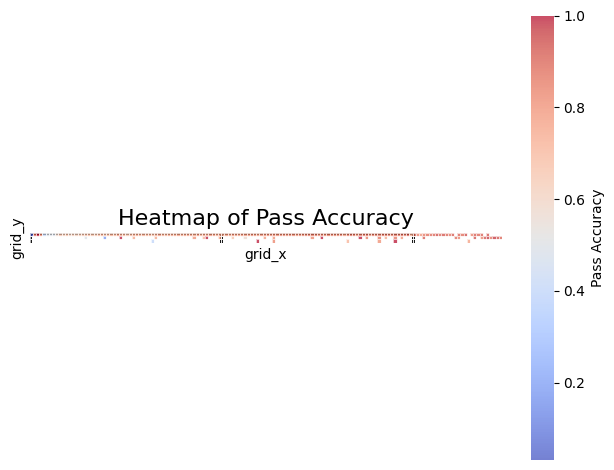

In [65]:
# Divide the pitch into grids (10x8 grid for simplicity)
pitch = Pitch(pitch_color='white', line_color='black', pitch_type='statsbomb')
fig, ax = pitch.draw()

df2['grid_x'] = (df2['PasTotDist'] // 10).astype(int)  # Adjust grid based on total pass distance
df2['grid_y'] = (df2['PasProg'] // 10).astype(int)  # Adjust grid based on progressive pass distance


# Calculate pass accuracy for each grid
pass_stats = df2.groupby(['grid_x', 'grid_y']).agg(
    total_passes=('PasTotAtt', 'sum'),  # Total passes attempted
    successful_passes=('PasTotCmp', 'sum')  # Total passes completed
).reset_index()
pass_stats['pass_accuracy'] = pass_stats['successful_passes'] / pass_stats['total_passes']

# Create heatmap data
heatmap_data = pass_stats.pivot(index='grid_y', columns='grid_x', values='pass_accuracy')

# Plot heatmap on the pitch
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, ax=ax, 
            cbar_kws={'label': 'Pass Accuracy'}, alpha=0.7, zorder=2)

plt.title('Heatmap of Pass Accuracy', fontsize=16)

## Top 5 Players by Pasing Accuracy

(0.0, 100.0)

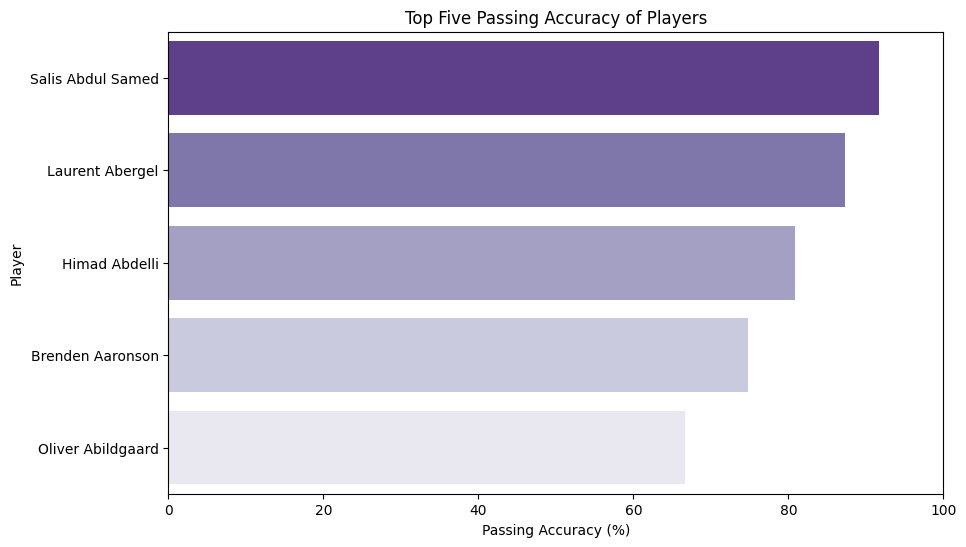

In [66]:
# Step 1: Filter relevant columns for passing accuracy visualization
columns_needed = ['Player', 'PasTotCmp', 'PasTotAtt']
df_passing = df2[columns_needed].head()

# Step 2: Calculate passing accuracy
df_passing['Passing Accuracy (%)'] = (df_passing['PasTotCmp'] / df_passing['PasTotAtt']) * 100

# Step 3: Sort by passing accuracy
df_passing = df_passing.sort_values(by='Passing Accuracy (%)', ascending=False)

# Step 4: Plot the passing accuracy as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Passing Accuracy (%)', y='Player', data=df_passing, palette='Purples_r')
plt.xlabel('Passing Accuracy (%)')
plt.ylabel('Player')
plt.title('Top Five Passing Accuracy of Players')
plt.xlim(0, 100)

## Top Five Success Dribbles

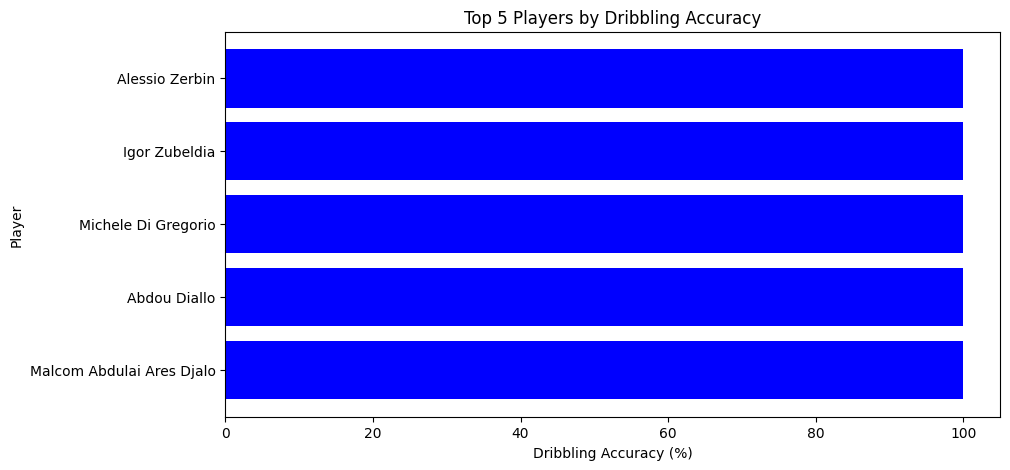

In [67]:
# Selecting relevant columns
columns_needed2 = ['Player', 'ToAtt', 'ToSuc']  # Total attempted take-ons and successful take-ons
dribbling_df = df2[columns_needed2].copy()

# Calculating dribbling accuracy
# Avoid division by zero by replacing NaN values with 0 after calculation
dribbling_df['Dribbling Accuracy'] = (dribbling_df['ToSuc'] / dribbling_df['ToAtt']) * 100
dribbling_df['Dribbling Accuracy'] = dribbling_df['Dribbling Accuracy'].fillna(0)

# Sorting players by dribbling accuracy
dribbling_df = dribbling_df.sort_values(by='Dribbling Accuracy', ascending=False)

# Plotting
top_n = 5  # Number of top players to display
plt.figure(figsize=(10, 5))
plt.barh(dribbling_df['Player'][:top_n], dribbling_df['Dribbling Accuracy'][:top_n], color='blue')
plt.xlabel('Dribbling Accuracy (%)')
plt.ylabel('Player')
plt.title('Top 5 Players by Dribbling Accuracy')
plt.gca().invert_yaxis()  # Highest accuracy at the top

## Top Five Players by Shooting Accuracy

(0.0, 100.0)

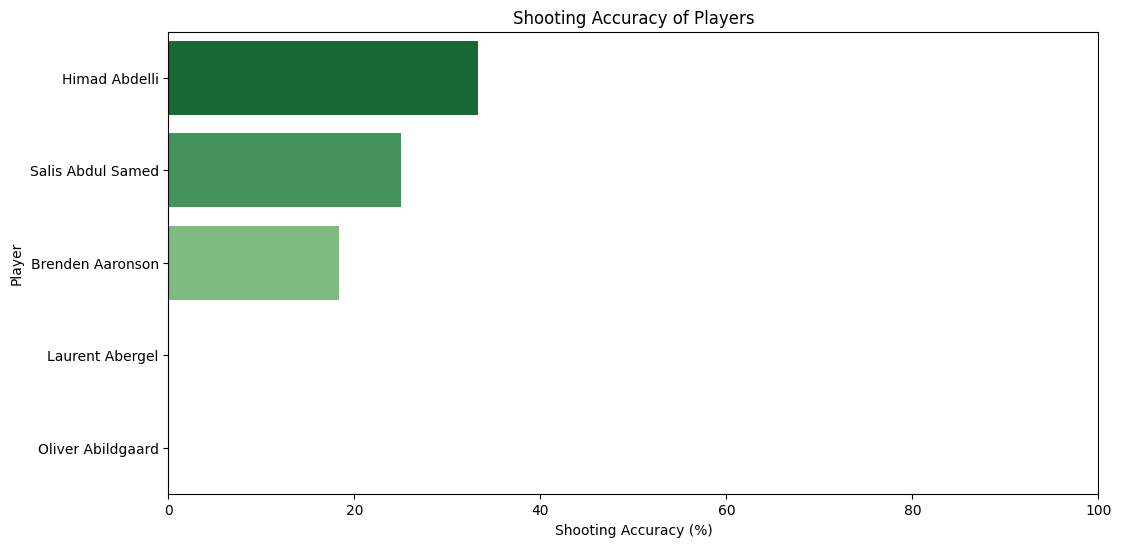

In [68]:
# Step 1: Filter relevant columns for shooting accuracy
shooting_columns = ['Player', 'Shots', 'SoT', 'G/Sh', 'G/SoT']
df_shooting = df2[shooting_columns].head()

# Step 2: Compute Shooting Accuracy Metrics
df_shooting['Shooting Accuracy (%)'] = (df_shooting['SoT'] / df_shooting['Shots']) * 100

# Step 3: Plot Shooting Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(y='Player', x='Shooting Accuracy (%)', data=df_shooting.sort_values('Shooting Accuracy (%)', ascending=False), palette='Greens_r')
plt.xlabel('Shooting Accuracy (%)')
plt.ylabel('Player')
plt.title('Shooting Accuracy of Players')
plt.xlim(0, 100)  # Accuracy is a percentage, so limit x-axis to 100%

## Top Five Players by Pysical Duels Success

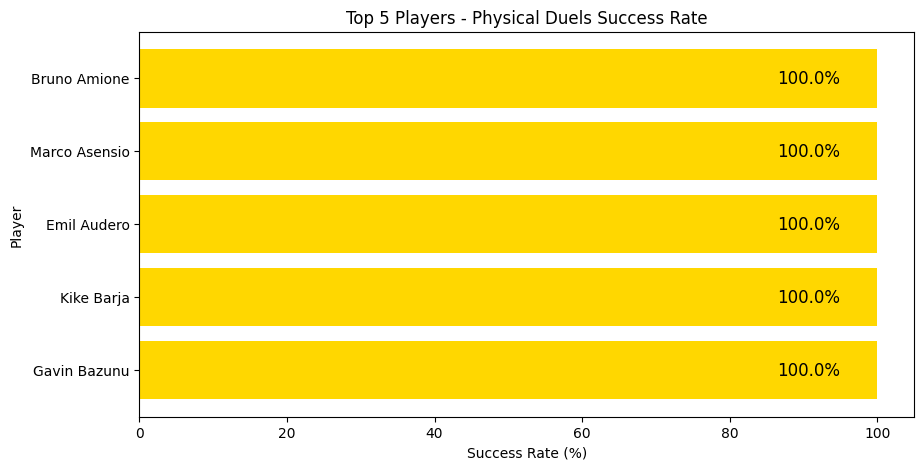

In [69]:
# Selecting the relevant columns for Physical Duels Success Rate
columns_needed3 = ['Player', 'AerWon', 'AerLost']
df_physical = df2[columns_needed3].copy()

# Calculating physical duels success rate
df_physical['Physical Success %'] = (df_physical['AerWon'] / (df_physical['AerWon'] + df_physical['AerLost'])) * 100

# Sorting by highest success rate and selecting the top five players
top_five_physical = df_physical.nlargest(5, 'Physical Success %')

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_five_physical['Player'], top_five_physical['Physical Success %'], color='gold')
plt.xlabel('Success Rate (%)')
plt.ylabel('Player')
plt.title('Top 5 Players - Physical Duels Success Rate')
plt.gca().invert_yaxis()  # Invert y-axis to show highest on top

# Display the values on bars
for index, value in enumerate(top_five_physical['Physical Success %']):
    plt.text(value - 5, index, f'{value:.1f}%', va='center', ha='right', fontsize=12, color='black')

## Top 5 devensive Actions in Percentge

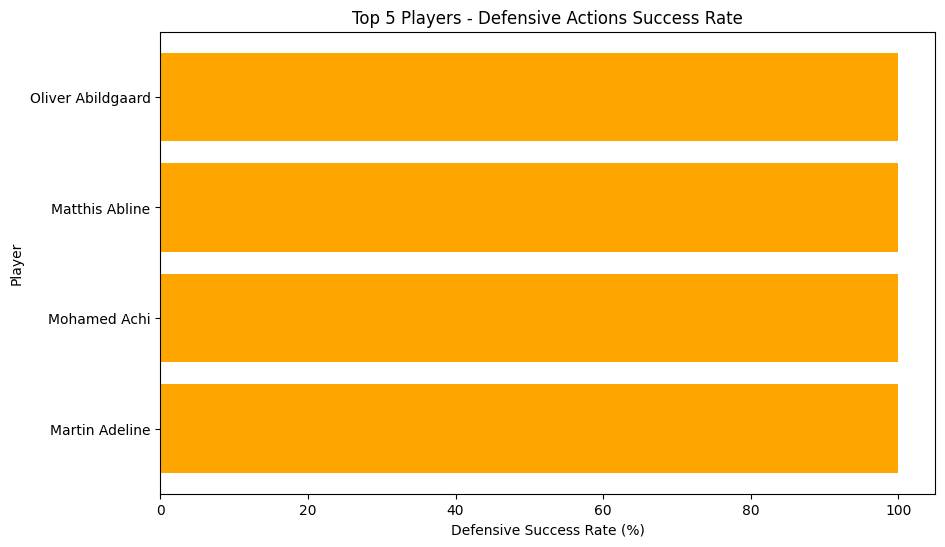

In [70]:
# Calculate Defensive Actions Success Rate
df['Defensive_Success'] = (df['TklWon'] / df['Tkl']) * 100

# Select top five players with highest success rate
top_defenders = df.nlargest(5, 'Defensive_Success')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_defenders['Player'], top_defenders['Defensive_Success'], color='orange')
plt.xlabel('Defensive Success Rate (%)')
plt.ylabel('Player')
plt.title('Top 5 Players - Defensive Actions Success Rate')
plt.gca().invert_yaxis()  # Invert y-axis for ranking order

## Building the model using the ensemble method